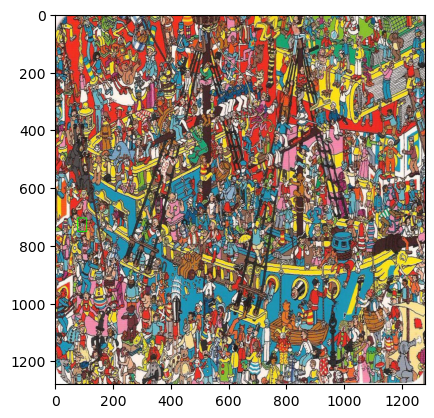

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

# Загрузка изображения и шаблона
image = cv2.imread('11.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template = cv2.imread('test71.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# Применение кросс-корреляции
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Нахождение положения максимального значения в результате
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    resized_template = cv2.resize(template, (int(template.shape[1] * scale), int(template.shape[0] * scale)))
    result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)
    h, w = template.shape[:2]
    threshold = 0.8  # Порог для совпадений
    loc = np.where(result >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + int(w * scale), pt[1] + int(h * scale)), (0, 255, 0), 2)

# Вывод результатов
plt.imshow(image)

In [2]:
cv2.imwrite("123D.jpg", image)

True